In [160]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import random
%matplotlib inline

In [161]:
df = pd.read_excel('wages.xlsx')[['region', 'avg_wage']]
df.head()

region      avg_wage
0          Российская Федерация   37111.190909
1  Центральный федеральный округ  46604.500000
2           Белгородская область  27090.100000
3               Брянская область  23036.145455
4           Владимирская область  26022.872727

In [137]:
df = df.dropna()

In [138]:
df.shape

(91, 2)

In [139]:
df.isnull().any()

region      False
avg_wage    False
dtype: bool

In [140]:
df[df.avg_wage.isnull()]

Empty DataFrame
Columns: [region, avg_wage]
Index: []

In [141]:
def preprocess_name(text):
    if not text or text is np.NaN:
        return text
    text = text.replace('г.', '').replace('—', '-').strip().lower()
    
    replacing = {
        'республика тува (тыва)': 'республика тыва',
        'ханты-мансийский автономный округ - югра': 'ханты-мансийский автономный округ-югра',
        'республика крым*': 'крымский федеральный округ'
    }
    
    if replacing.get(text):
        text = replacing[text]
    return text

In [142]:
df['region'] = df['region'].apply(preprocess_name) 
df.head()

region      avg_wage
0           российская федерация  37111.190909
1  центральный федеральный округ  46604.500000
2           белгородская область  27090.100000
3               брянская область  23036.145455
4           владимирская область  26022.872727

In [170]:
import json
lookup_df = df.copy()
lookup_df.index = lookup_df.region

with open('region_wages.json', 'w') as f:
    f.write(json.dumps(lookup_df.to_dict()['avg_wage']))

In [143]:
df['yearly_income'] = df['avg_wage']*12 
df.head()

region      avg_wage  yearly_income
0           российская федерация  37111.190909  445334.290909
1  центральный федеральный округ  46604.500000  559254.000000
2           белгородская область  27090.100000  325081.200000
3               брянская область  23036.145455  276433.745455
4           владимирская область  26022.872727  312274.472727

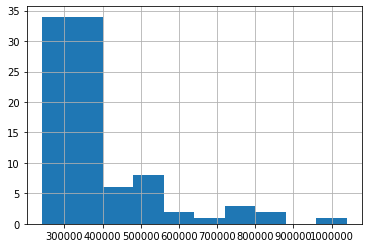

In [144]:
df.yearly_income.hist()

In [145]:
df.avg_wage.hist()

# Merge to declarations 

In [146]:
df_dec = pd.read_csv('declarations_raw.csv')
df_dec.head()

document_type party  person_id                 person_name  \
0  Антикоррупционная декларация  КПРФ          8  Зюганов Геннадий Андреевич   
1  Антикоррупционная декларация  КПРФ          8  Зюганов Геннадий Андреевич   
2  Антикоррупционная декларация  КПРФ          8  Зюганов Геннадий Андреевич   
3  Антикоррупционная декларация  КПРФ          8  Зюганов Геннадий Андреевич   
4  Антикоррупционная декларация  КПРФ          8  Зюганов Геннадий Андреевич   

   year  office_id           office_name  \
0  2009         14  Государственная Дума   
1  2010         14  Государственная Дума   
2  2011         14  Государственная Дума   
3  2012         14  Государственная Дума   
4  2013         14  Государственная Дума   

                                         office_post  office_type_id  \
0                 Член комитета Государственной Думы               7   
1                 Член комитетa Государственной Думы               7   
2                                                NaN               7   
3  Член комитета ГД по науке и наукоемким техноло...               7   
4                 Член комитета Государственной Думы               7   

                          office_type_name  office_region_id  \
0  Федеральный, без региональной структуры               NaN   
1  Федеральный, без региональной структуры               NaN   
2  Федеральный, без региональной структуры               NaN   
3  Федеральный, без региональной структуры               NaN   
4  Федеральный, без региональной структуры               NaN   

  office_region_name  income_personal  income_relatives  savings  \
0                NaN       2075542.33         102279.19      0.0   
1                NaN       2127686.49         168601.94      0.0   
2                NaN       2177566.64         137656.24      0.0   
3                NaN       2458749.04         194266.38      0.0   
4                NaN       3194615.67         198267.22      0.0   

   real_estate_amount  real_estate_squares  real_estate_price  \
0                   3                448.7       2.390986e+07   
1                   3                448.7       4.094214e+07   
2                   3                448.7       4.384684e+07   
3                   3                448.7       2.390986e+07   
4                   3                448.7       2.390986e+07   

   real_estate_share_price mode_real_estate_region  
0             2.390986e+07                     NaN  
1             4.094214e+07                  москва  
2             4.384684e+07                  москва  
3             2.390986e+07                     NaN  
4             2.390986e+07                     NaN

In [147]:
df_dec['region'] = df_dec.office_region_name.fillna(df_dec.mode_real_estate_region).fillna('российская федерация').apply(preprocess_name)

In [148]:
df_dec.shape

(89556, 21)

In [149]:
person_region = df_dec.groupby(['person_id'])['region'].agg(lambda x:x.value_counts().index[0]).reset_index()
person_region.head()

person_id                 region
0          8   российская федерация
1          9   российская федерация
2         10   российская федерация
3         11  волгоградская область
4         12   российская федерация

In [150]:
person_region.shape

(51673, 2)

In [151]:
person_region_income = pd.merge(person_region, df, on='region', how='left')
person_region_income.head()

person_id                 region      avg_wage  yearly_income
0          8   российская федерация  37111.190909  445334.290909
1          9   российская федерация  37111.190909  445334.290909
2         10   российская федерация  37111.190909  445334.290909
3         11  волгоградская область  25977.618182  311731.418182
4         12   российская федерация  37111.190909  445334.290909

In [152]:
person_region_income.shape

(51673, 4)

In [153]:
person_region_income = person_region_income.fillna(method='pad')

In [154]:
person_region_income[person_region_income.isnull().any(axis=1)]

Empty DataFrame
Columns: [person_id, region, avg_wage, yearly_income]
Index: []

In [155]:
person_region_income.yearly_income.hist(bins=10)

In [157]:
person_region_income.head()

person_id                 region      avg_wage  yearly_income
0          8   российская федерация  37111.190909  445334.290909
1          9   российская федерация  37111.190909  445334.290909
2         10   российская федерация  37111.190909  445334.290909
3         11  волгоградская область  25977.618182  311731.418182
4         12   российская федерация  37111.190909  445334.290909

In [158]:
person_region_income.columns = ['person_id', 'region', 'region_avg_wage', 'region_yearly_income']

In [159]:
person_region_income.to_csv('person_region_incomes.csv', index=None)